In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs

centers = np.array([[-5,7],
                  [0,0],
                  [10,10]])
X, y = make_blobs(n_samples=1000, centers=centers, n_features=2, random_state=0)

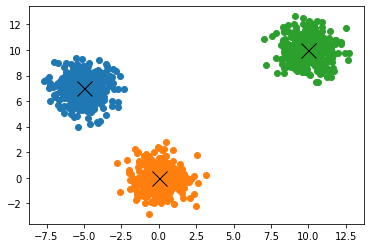

In [2]:
for i in range(3):
    plt.plot(X[y==i,0], X[y==i,1], 'o')
for i in range(3):
    plt.plot(centers[i,0], centers[i,1], 'kx', markersize = 15)

Algorithm
![](kmeans.png)

In [3]:
K = 3

m = np.random.rand(K,X.shape[1]) * 4
m

array([[2.46316738, 0.89193538],
       [0.92324261, 2.21350315],
       [1.51122615, 3.84522086]])

In [4]:
X.shape, m.shape

((1000, 2), (3, 2))

In [5]:
XE = X.reshape(-1, *X.shape)
XE.shape

(1, 1000, 2)

In [6]:
me = m.reshape( m.shape[0], -1, m.shape[1])
me.shape

(3, 1, 2)

In [7]:
D = XE - me
D.shape

(3, 1000, 2)

In [8]:
D2 = np.sum(D**2, axis = -1)
D2.shape

(3, 1000)

In [9]:
b = np.argmin(D2, axis = 0)
b[:20]

array([1, 2, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2])

In [10]:
for i in range(K):
    m[i] = X[b==i].mean(axis = 0)

In [11]:
m

array([[ 0.76863508, -0.59369634],
       [-0.92182779,  0.79883863],
       [ 2.68265811,  8.61623086]])

# High dimensional substraction

In [12]:
A = np.array([[-10,10],
              [0,0],
              [0,0],
              [10,10]])

B = np.array([[1,1],
              [2,2],
              [3,3]])

In [13]:
A

array([[-10,  10],
       [  0,   0],
       [  0,   0],
       [ 10,  10]])

In [14]:
B

array([[1, 1],
       [2, 2],
       [3, 3]])

In [15]:
AE = A.reshape(-1, *A.shape)
AE, AE.shape

(array([[[-10,  10],
         [  0,   0],
         [  0,   0],
         [ 10,  10]]]),
 (1, 4, 2))

In [16]:
BE = B.reshape(B.shape[0], -1, B.shape[1])
BE,BE.shape

(array([[[1, 1]],
 
        [[2, 2]],
 
        [[3, 3]]]),
 (3, 1, 2))

In [17]:
AE - BE

array([[[-11,   9],
        [ -1,  -1],
        [ -1,  -1],
        [  9,   9]],

       [[-12,   8],
        [ -2,  -2],
        [ -2,  -2],
        [  8,   8]],

       [[-13,   7],
        [ -3,  -3],
        [ -3,  -3],
        [  7,   7]]])

# Kmeans

In [29]:
def kmeans(X, K = 3):
    m = np.random.rand(K,X.shape[1])* 10
    XE = X.reshape(-1, *X.shape)

    means = []
    means.append(m)
    for i in range(100):
        me = m.reshape( m.shape[0], -1, m.shape[1])
        D = XE - me
        D2 = np.sum(D**2, axis = -1)
        b = np.argmin(D2, axis = 0)

        m = np.array([X[b==i].mean(axis = 0) for i in range(K)])
        means.append(m)
    return means

In [30]:
def draw(X, means, ix = 0):
    print(means[ix])
    for i in range(3):
        plt.plot(X[y==i,0], X[y==i,1], 'o')
    for i in range(3):
        plt.plot(means[ix][i,0], means[ix][i,1], 'kx', markersize = 15)

In [31]:
means = kmeans(X, K = 3)

[[0.31927344 7.15349867]
 [4.0689375  1.43685901]
 [9.46981186 6.50288427]]


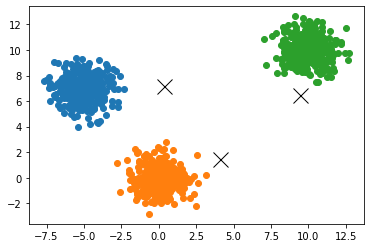

In [32]:
draw(X, means, ix = 0)

[[-5.06246494  6.91807374]
 [ 0.0863372  -0.0598533 ]
 [ 9.9574262  10.04942179]]


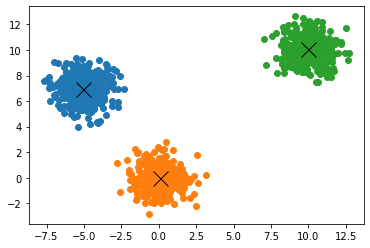

In [33]:
draw(X, means, ix = 1)

[[-5.09062548  6.96406454]
 [ 0.0681967  -0.04311801]
 [ 9.9574262  10.04942179]]


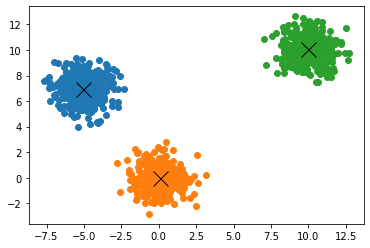

In [34]:
draw(X, means, ix = 2)

[[-5.09062548  6.96406454]
 [ 0.0681967  -0.04311801]
 [ 9.9574262  10.04942179]]


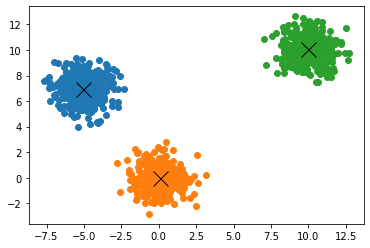

In [35]:
draw(X, means, ix = 3)

[[-5.09062548  6.96406454]
 [ 0.0681967  -0.04311801]
 [ 9.9574262  10.04942179]]


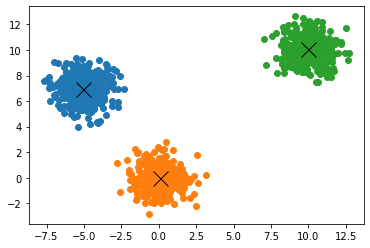

In [36]:
draw(X, means, ix = 99)

# GMM

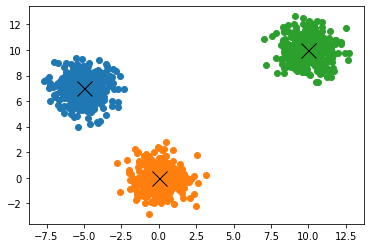

In [37]:
for i in range(3):
    plt.plot(X[y==i,0], X[y==i,1], 'o')
for i in range(3):
    plt.plot(centers[i,0], centers[i,1], 'kx', markersize = 15)

In [38]:
m = np.random.rand(K,X.shape[1])* 10
XE = X.reshape(-1, *X.shape)

means = []
means.append(m)
for i in range(100):
    me = m.reshape( m.shape[0], -1, m.shape[1])
    D = XE - me
    D2 = np.sum(D**2, axis = -1)
    b = np.argmin(D2, axis = 0)

    m = np.array([X[b==i].mean(axis = 0) for i in range(K)])
    means.append(m)

[[ 9.9574262  10.04942179]
 [-5.09062548  6.96406454]
 [ 0.0681967  -0.04311801]]


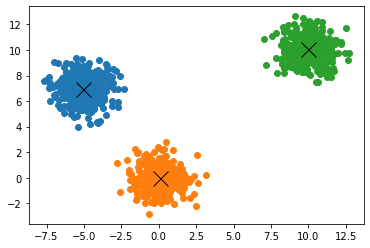

In [39]:
draw(X, means, ix = 90)